In [2]:
import pandas as pd
import numpy as np

india=pd.read_csv('GlobalLandTemperaturesByCity.csv')
india.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [3]:
# Filter the data for India
india_df = india[india['Country'] == 'India']

india_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
49880,1816-03-01,19.934,2.258,Abohar,India,29.74N,73.85E
49881,1816-04-01,26.641,3.398,Abohar,India,29.74N,73.85E
49882,1816-05-01,32.535,2.408,Abohar,India,29.74N,73.85E
49883,1816-06-01,33.254,2.123,Abohar,India,29.74N,73.85E
49884,1816-07-01,31.105,1.848,Abohar,India,29.74N,73.85E


In [5]:
india_df.shape

(1014906, 7)

In [6]:
india_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1014906 entries, 49880 to 8385509
Data columns (total 7 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   dt                             1014906 non-null  object 
 1   AverageTemperature             960548 non-null   float64
 2   AverageTemperatureUncertainty  960548 non-null   float64
 3   City                           1014906 non-null  object 
 4   Country                        1014906 non-null  object 
 5   Latitude                       1014906 non-null  object 
 6   Longitude                      1014906 non-null  object 
dtypes: float64(2), object(5)
memory usage: 61.9+ MB


In [7]:
india_df=india_df.dropna()

In [8]:
india_df.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [9]:
# converting to datetime and extracting months and years
def converToDateTime(df):
  df = df.copy()
  df['dt'] = pd.to_datetime(df['dt'])
  df['Month'] = df['dt'].dt.month
  df['Year'] = df['dt'].dt.year
  return df

temp = converToDateTime(india_df)
temp = temp.drop(['dt','Month'], axis=1)

temp = temp.set_index('Year')
temp.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
Year,,,,,,
1816,19.934,2.258,Abohar,India,29.74N,73.85E
1816,26.641,3.398,Abohar,India,29.74N,73.85E
1816,32.535,2.408,Abohar,India,29.74N,73.85E
1816,33.254,2.123,Abohar,India,29.74N,73.85E
1816,31.105,1.848,Abohar,India,29.74N,73.85E


In [10]:
mean_values = temp.groupby('Year').agg({
    'AverageTemperature': 'mean',
    'AverageTemperatureUncertainty': 'mean'
}).reset_index()

In [15]:
# Merge the mean values back into the original DataFrame
india_temp = temp.drop(columns=['AverageTemperature', 'AverageTemperatureUncertainty']).merge(mean_values, on='Year', how='left')
india_temp = india_temp.drop_duplicates(subset='Year', keep='first')
india_temp

,Year,City,Country,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty
0,1816,Abohar,India,29.74N,73.85E,24.096616,2.834865
10,1817,Abohar,India,29.74N,73.85E,24.095935,2.435318
22,1818,Abohar,India,29.74N,73.85E,24.423027,2.897197
34,1819,Abohar,India,29.74N,73.85E,24.172483,2.154878
46,1820,Abohar,India,29.74N,73.85E,24.434644,2.077982
...,...,...,...,...,...,...,...
2831,1867,Achalpur,India,21.70N,77.02E,25.748709,1.438211
2843,1868,Achalpur,India,21.70N,77.02E,25.530388,1.534570
2855,1869,Achalpur,India,21.70N,77.02E,25.628329,1.551571
10331,1863,Agartala,India,23.31N,91.75E,24.872152,1.575278


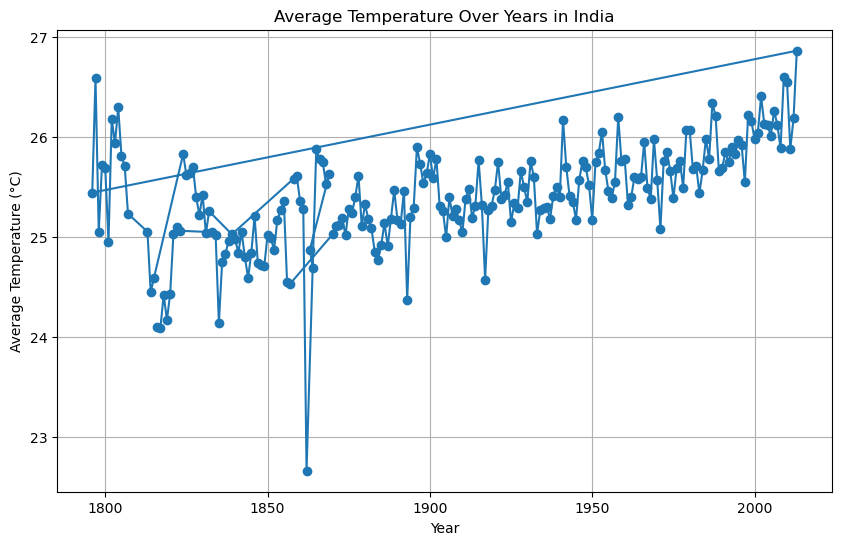

In [16]:
import matplotlib.pyplot as plt

# Time series plot of average temperature over years
plt.figure(figsize=(10, 6))
plt.plot(india_temp['Year'], india_temp['AverageTemperature'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature Over Years in India')
plt.grid(True)
plt.show()

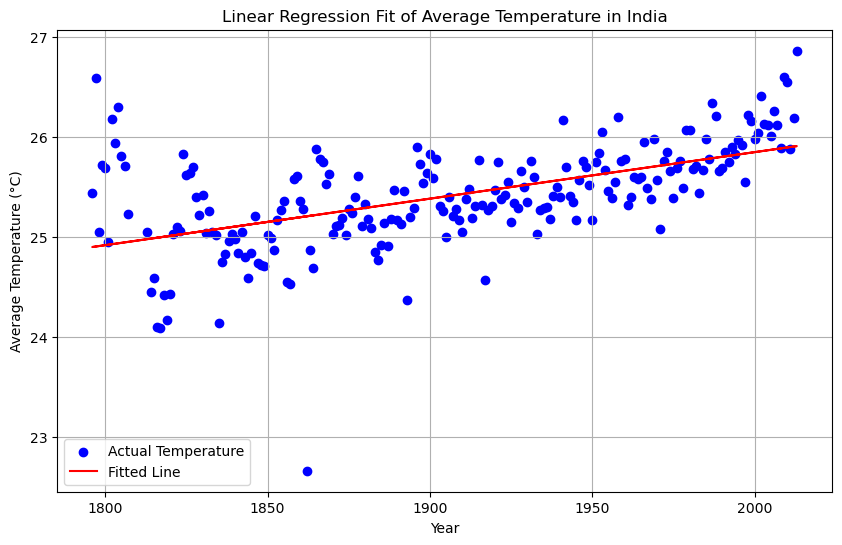

Slope (Warming Rate): 0.004650112160711996 degrees per year
Intercept: 16.54972160162798 degrees


In [17]:
from sklearn.linear_model import LinearRegression

# Prepare data for linear regression
X = india_temp[['Year']]
y = india_temp['AverageTemperature']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
india_temp['PredictedTemperature'] = model.predict(X)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(india_temp['Year'], india_temp['AverageTemperature'], color='blue', label='Actual Temperature')
plt.plot(india_temp['Year'], india_temp['PredictedTemperature'], color='red', label='Fitted Line')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Linear Regression Fit of Average Temperature in India')
plt.legend()
plt.grid(True)
plt.show()

# Print the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope (Warming Rate): {slope} degrees per year")
print(f"Intercept: {intercept} degrees")

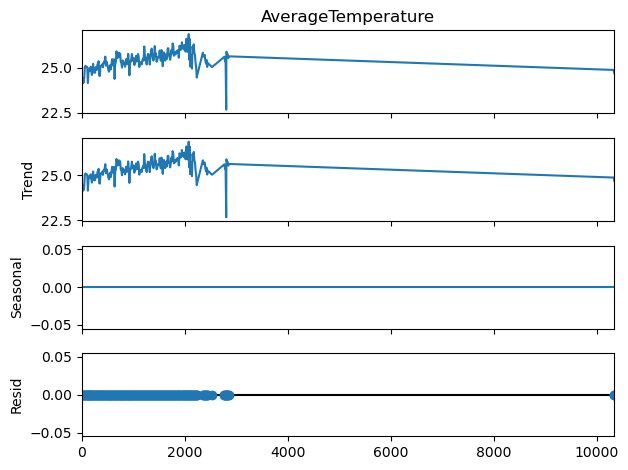

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition
result = seasonal_decompose(india_temp['AverageTemperature'], model='additive', period=1)

# Plot the decomposition
result.plot()
plt.show()

In [23]:
pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/ae/6d/18a7546e1748ecdd6ed7cd00d3f183faf1df08bd4f5e5e0eb3e72458b862/folium-0.17.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/75/ca/6074ab4a04dd1a503201c18091b3426f3709670115fae316907a97f98d75/branca-0.7.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   ----------- --------------------------- 30.7/108.4 kB 163.8 kB/s eta 0:00:01
   -------------- ------------------------ 41.0/108.4 kB 196.9 kB/s eta 0:00:01
   -------------- ------------------------ 41.0/108.4 kB 196.9 kB/s eta 0:00:01
   -------------------------------------- 108.4/108.4 kB 392.7 kB/s 

In [26]:
india_temp["Latitude"] = india_temp["Latitude"].str.replace(r"[^\d.]", "", regex=True).astype(float).round(2)
india_temp["Longitude"] = india_temp["Longitude"].str.replace(r"[^\d.]", "", regex=True).astype(float).round(2)
india_temp

,Year,City,Country,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty,PredictedTemperature
0,1816,Abohar,India,29.74,73.85,24.096616,2.834865,24.994325
10,1817,Abohar,India,29.74,73.85,24.095935,2.435318,24.998975
22,1818,Abohar,India,29.74,73.85,24.423027,2.897197,25.003626
34,1819,Abohar,India,29.74,73.85,24.172483,2.154878,25.008276
46,1820,Abohar,India,29.74,73.85,24.434644,2.077982,25.012926
...,...,...,...,...,...,...,...,...
2831,1867,Achalpur,India,21.70,77.02,25.748709,1.438211,25.231481
2843,1868,Achalpur,India,21.70,77.02,25.530388,1.534570,25.236131
2855,1869,Achalpur,India,21.70,77.02,25.628329,1.551571,25.240781
10331,1863,Agartala,India,23.31,91.75,24.872152,1.575278,25.212881


In [48]:
max_temp_row = india_temp.loc[india_temp['AverageTemperature'].idxmax()]
max_temp_row

Year                                  2013
City                                Abohar
Country                              India
Latitude                             29.74
Longitude                            73.85
AverageTemperature               26.864186
AverageTemperatureUncertainty     0.533801
PredictedTemperature             25.910397
Name: 2075, dtype: object

C:\Users\koninika tarafdar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\koninika tarafdar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\koninika tarafdar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\koninika tarafdar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\koninika tarafdar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: Future

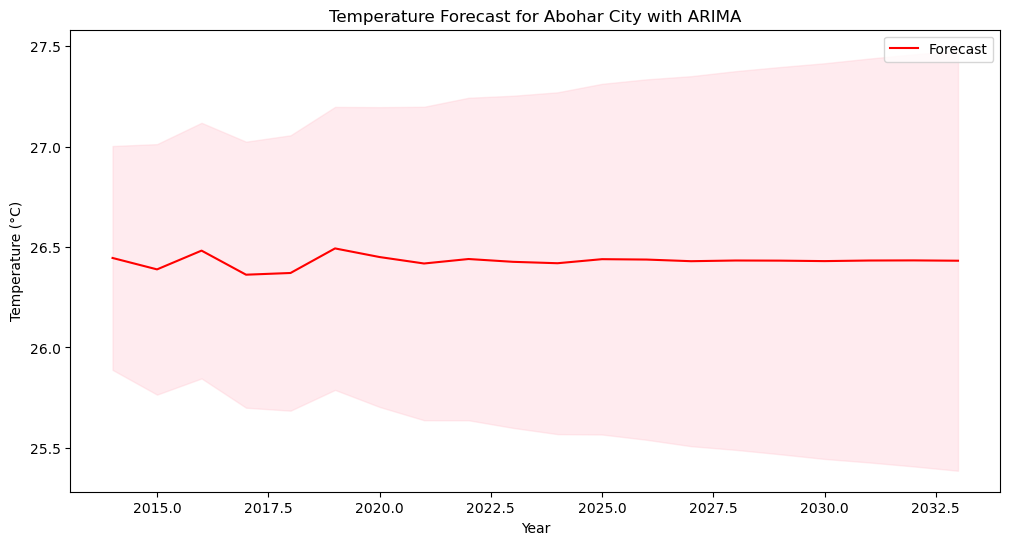

In [50]:

from statsmodels.tsa.arima.model import ARIMA
abohar_df = india_temp[india_temp['City'] == 'Abohar']

# Fit the ARIMA model
model = ARIMA(abohar_df['AverageTemperature'], order=(5, 1, 0))
results = model.fit()

# Forecast future values
forecast_steps = 20
forecast = results.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Create a DataFrame for the forecast
years_forecast = [year for year in range(abohar_df['Year'].iloc[-1] + 1, abohar_df['Year'].iloc[-1] + 1 + forecast_steps)]
forecast_df = pd.DataFrame({
    'Year': years_forecast,
    'ForecastedTemperature': forecast_values,
    'LowerCI': conf_int.iloc[:, 0],
    'UpperCI': conf_int.iloc[:, 1]
})

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Year'], forecast_df['ForecastedTemperature'], label='Forecast', color='red')
plt.fill_between(forecast_df['Year'], forecast_df['LowerCI'], forecast_df['UpperCI'], color='pink', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Forecast for Abohar City with ARIMA')
plt.legend()
plt.show()